<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>



# 🦖 Grounding DINO Demo 🦕


#### What is Grounding DINO?
As of January 2024, Grounding DINO is a SOTA zero-shot object detection model, allowing Grounding DINO to identify objects that were not in its training data (through the use of vision-language modality fusion at multiple phases). It has both a text backbone (BERT transformer) and an image backbone (SWIN transformer).

.

#### Example Application
Virtual staging of homes is a lucrative business with images costing >$10 per image for virtual staging (see: https://www.applydesign.io/). Let's replicate what they are doing here!

Image to stage: [Image Source](https://www.wayfair.com/furniture/pdp/astoria-grand-vega-vega-2-piece-upholstered-living-room-set-w010955836.html)



### Getting Started

You will need a GPU for this demo.


### Install libraries

There are a number of "heavy" libraries required only for this demo, so I recommend either running this demo in Google Colab OR adding the following libraries to the requirements.txt file in your fork of the AIPI repo.

In [1]:
! pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 10.1 MB/s eta 0:00:00


### Get AIPI 540 course repo
(In Google Colab only, otherwise SKIP)

In [2]:
# Run this cell only if working in Colab
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "AIPI540-Deep-Learning-Applications" # Enter repo name
git_path = 'https://github.com/AIPI540/AIPI540-Deep-Learning-Applications.git'
!git clone "{git_path}"

# Change working directory to location of notebook
notebook_dir = '2_computer_vision'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'AIPI540-Deep-Learning-Applications'...
remote: Enumerating objects: 1792, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1792 (delta 101), reused 168 (delta 67), pack-reused 1580
Receiving objects: 100% (1792/1792), 345.22 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (659/659), done.
Updating files: 100% (555/555), done.
/content/AIPI540-Deep-Learning-Applications/2_computer_vision
CNNs/  GANs/  model_interpretation/  object_detection/  README.md


### Clone the GroundingDINO git repo

In [3]:
HOME = os.getcwd()
print(HOME)

%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/AIPI540-Deep-Learning-Applications/2_computer_vision
/content/AIPI540-Deep-Learning-Applications/2_computer_vision
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 421 (delta 137), reused 130 (delta 123), pack-reused 238
Receiving objects: 100% (421/421), 12.85 MiB | 18.49 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/AIPI540-Deep-Learning-Applications/2_computer_vision/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.1 MB/s eta 0:00:00
/content/AIPI540-Deep-Learning-Applications/2_computer_vision/GroundingDINO/groundingdino/c

### Get the weights for Grounding DINO.
(Note these weights are from v0.1.0-alpha, you may want to explore other, more recent weights)

In [4]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/AIPI540-Deep-Learning-Applications/2_computer_vision
/content/AIPI540-Deep-Learning-Applications/2_computer_vision/weights
/content/AIPI540-Deep-Learning-Applications/2_computer_vision/weights/groundingdino_swint_ogc.pth ; exist: True


### Configure Grounding DINO model with weights

In [5]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate
from groundingdino.util.inference import Model

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/AIPI540-Deep-Learning-Applications/2_computer_vision/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/AIPI540-Deep-Learning-Applications/2_computer_vision/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/AIPI540-Deep-Learning-Applications/2_computer_vision/weights/groundingdino_swint_ogc.pth ; exist: True
final text_encoder_type: bert-base-uncased


### Import libraries
(Stable Diffusion and Grounding DINO use PyTorch!)

In [6]:
import torch
from torchvision.ops import box_convert
import numpy as np
from PIL import Image
import supervision as sv

### Run Grounding DINO model on image

Inputs:
* Image Path
* Text Prompt (objects you want removed from scene)
* Box Threshold (confidence threshold to place a bounding box)
* Text Threshold (confidence threshold to place text, go ahead and use same as box threshold)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


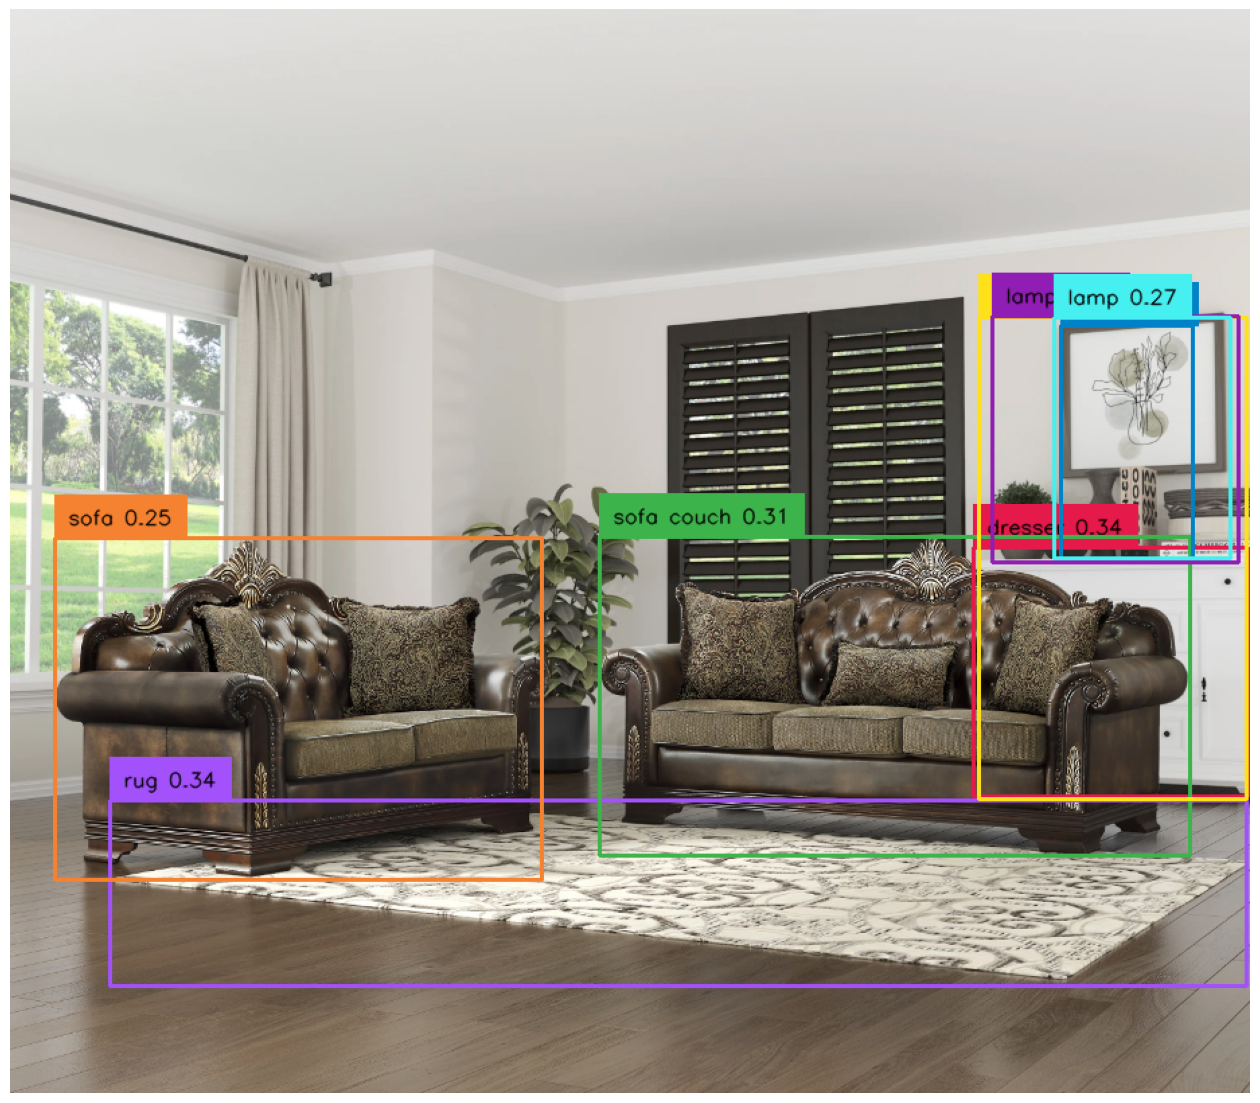

In [8]:
IMAGE_PATH = "/content/AIPI540-Deep-Learning-Applications/2_computer_vision/object_detection/data/images/traditionalgdino.png"
TEXT_PROMPT = "lamp, rug, bed, sofa, couch, dresser, chair, bench, table, vase"
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

### Generate Masks from Bounding Boxes

In [9]:
def generate_masks_with_grounding(image_source, boxes):
    h, w, _ = image_source.shape
    boxes_unnorm = boxes * torch.Tensor([w, h, w, h])
    boxes_xyxy = box_convert(boxes=boxes_unnorm, in_fmt="cxcywh", out_fmt="xyxy").numpy()
    mask = np.zeros_like(image_source)
    for box in boxes_xyxy:
        x0, y0, x1, y1 = box
        mask[int(y0):int(y1), int(x0):int(x1), :] = 255
    return mask

In [10]:
image_mask = generate_masks_with_grounding(image_source, boxes)

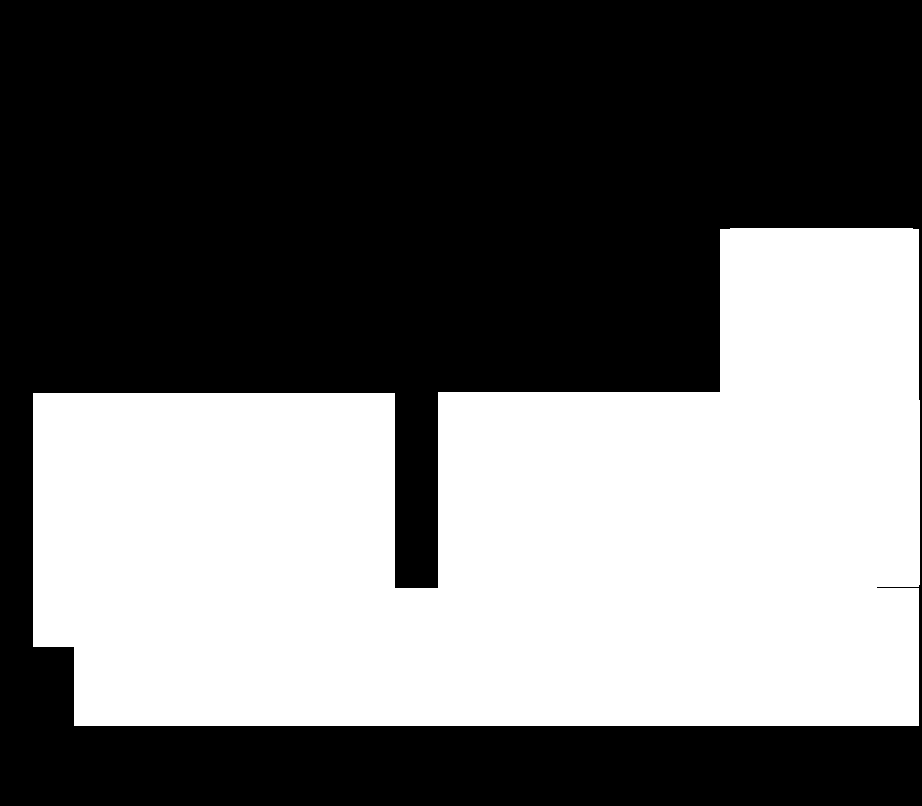

In [11]:
Image.fromarray(image_mask)

### Resize images for stable diffusion inpainting
For base SD, must be (512, 512) for best results

In [12]:
image_source = Image.fromarray(image_source)
annotated_frame = Image.fromarray(annotated_frame)
image_mask = Image.fromarray(image_mask)

image_source_for_inpaint = image_source.resize((512, 512))
image_mask_for_inpaint = image_mask.resize((512, 512))

### Create a pipe, using the pretrained stable diffusion model for inpainting from the diffusers library

In [13]:
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)

pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### Run stable diffusion inpainting

Inputs:
* Prompt
* Negative Prompt (things you don't want in final image)
* Image (original image as PIL Image)
* Mask (PIL image)

In [14]:
prompt = "beautiful luxury living room photo with white couch and glass coffee table, minimalist, white pallete, well lit, outdoor lighting, ultra realistic, highly detailed, 4K, DSLR"
negative_prompt="low resolution, ugly, monochrome, lowres, bad anatomy, worst quality, low quality"
image_inpainting = pipe(prompt=prompt, negative_prompt=negative_prompt, image=image_source_for_inpaint, mask_image=image_mask_for_inpaint).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

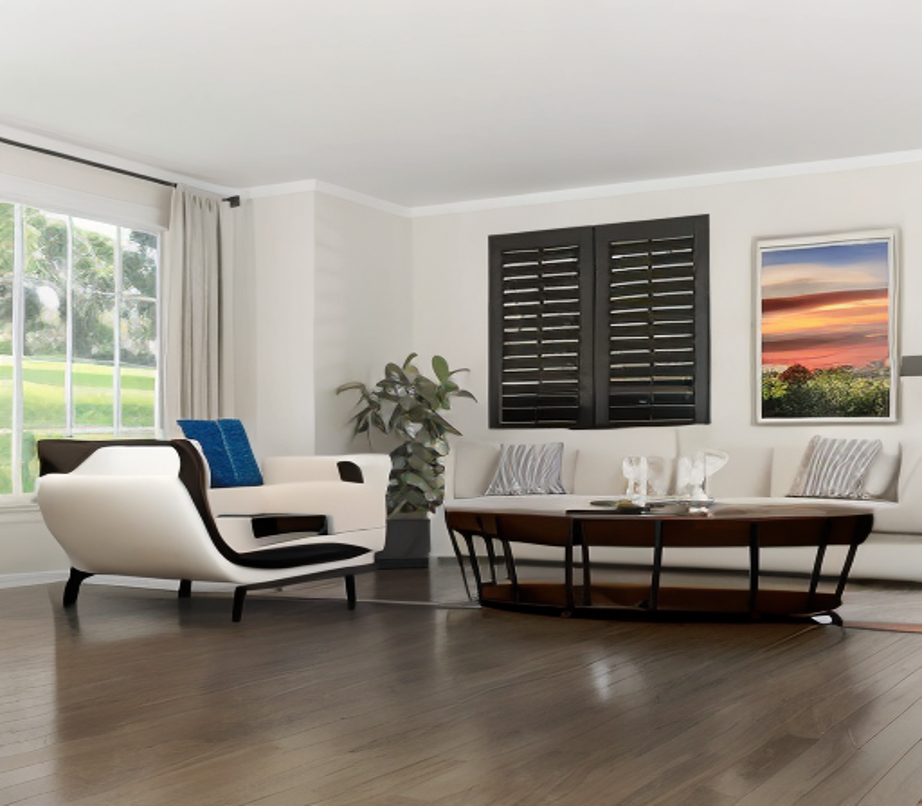

In [15]:
image_inpainting_resize = image_inpainting.resize((image_source.size[0], image_source.size[1]))
image_inpainting_resize